In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [156]:
df = pd.read_excel('/content/heart_disease.xlsx')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [159]:
mean_cholestrol = df['Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0, mean_cholestrol)

In [160]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
198.799564,172
254.000000,11
220.000000,10
223.000000,10
204.000000,9
...,...
353.000000,1
278.000000,1
157.000000,1


In [161]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,236.047413,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,56.240952,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [162]:
df.head(
)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [163]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [165]:
X_train.shape, X_test.shape

((734, 11), (184, 11))

In [166]:
X_train['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,401
NAP,162
ATA,139
TA,32


In [167]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,M,NAP,120,240.000000,1,Normal,194,N,0.8,Down
25,36,M,NAP,130,209.000000,0,Normal,178,N,0.0,Up
84,56,M,ASY,150,213.000000,1,Normal,125,Y,1.0,Flat
10,37,F,NAP,130,211.000000,0,Normal,142,N,0.0,Up
344,51,M,ASY,120,198.799564,1,Normal,104,N,0.0,Flat


In [168]:
X_train['Sex'] = X_train['Sex'].replace({'F': 0, 'M': 1})
X_train['ChestPainType'] = X_train['ChestPainType'].replace({'ATA': 0, 'NAP':1, 'ASY':2, 'TA':3})
X_train['RestingECG'] = X_train['RestingECG'].replace({'Normal': 0, 'ST':1, 'LVH':2})
X_train['ExerciseAngina'] = X_train['ExerciseAngina'].replace({'N': 0, 'Y':1})
X_train['ST_Slope'] = X_train['ST_Slope'].replace({'Up': 0, 'Flat':1, 'Down':2})

/tmp/ipython-input-3469007315.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Sex'] = X_train['Sex'].replace({'F': 0, 'M': 1})
/tmp/ipython-input-3469007315.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['ChestPainType'] = X_train['ChestPainType'].replace({'ATA': 0, 'NAP':1, 'ASY':2, 'TA':3})
/tmp/ipython-input-3469007315.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

In [169]:
X_test['Sex'] = X_test['Sex'].replace({'F': 0, 'M': 1})
X_test['ChestPainType'] = X_test['ChestPainType'].replace({'ATA': 0, 'NAP':1, 'ASY':2, 'TA':3})
X_test['RestingECG'] = X_test['RestingECG'].replace({'Normal': 0, 'ST':1, 'LVH':2})
X_test['ExerciseAngina'] = X_test['ExerciseAngina'].replace({'N': 0, 'Y':1})
X_test['ST_Slope'] = X_test['ST_Slope'].replace({'Up': 0, 'Flat':1, 'Down':2})

/tmp/ipython-input-1436949178.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Sex'] = X_test['Sex'].replace({'F': 0, 'M': 1})
/tmp/ipython-input-1436949178.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['ChestPainType'] = X_test['ChestPainType'].replace({'ATA': 0, 'NAP':1, 'ASY':2, 'TA':3})
/tmp/ipython-input-1436949178.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [170]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,1,120,240.000000,1,0,194,0,0.8,2
25,36,1,1,130,209.000000,0,0,178,0,0.0,0
84,56,1,2,150,213.000000,1,0,125,1,1.0,1
10,37,0,1,130,211.000000,0,0,142,0,0.0,0
344,51,1,2,120,198.799564,1,0,104,0,0.0,1


In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [173]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
X_train

array([[-1.24506731,  0.54060477, -0.52605558, ..., -0.83846064,
        -0.09706109,  2.25746543],
       [-1.8862362 ,  0.54060477, -0.52605558, ..., -0.83846064,
        -0.83628643, -1.07985506],
       [ 0.25099346,  0.54060477,  0.65837631, ...,  1.19266183,
         0.08774524,  0.58880518],
       ...,
       [ 0.67843939,  0.54060477,  0.65837631, ...,  1.19266183,
         0.45735791, -1.07985506],
       [ 0.67843939,  0.54060477,  0.65837631, ...,  1.19266183,
        -0.83628643, -1.07985506],
       [-1.45879027, -1.84978019,  0.65837631, ..., -0.83846064,
         1.01177691,  0.58880518]])

In [175]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [176]:
X_train.shape

(734, 11)

In [177]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [178]:
y_prob = model.predict(X_test)
y_pred = np.round(y_prob)
#

In [191]:
y_pred[4]

np.int64(0)

In [180]:
X_test[2]

array([ 1.2127468 ,  0.54060477,  0.65837631,  1.46181581, -0.70840757,
        1.84260945,  0.49990164, -0.56014845, -0.83846064,  0.27255158,
        0.58880518])

In [189]:
y_test

,HeartDisease
668,0
30,1
377,1
535,1
807,0
...,...
211,1
745,1
584,1
878,0


In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [193]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.8043478260869565
Precision: 0.8585858585858586


In [197]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        77
           1       0.86      0.79      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



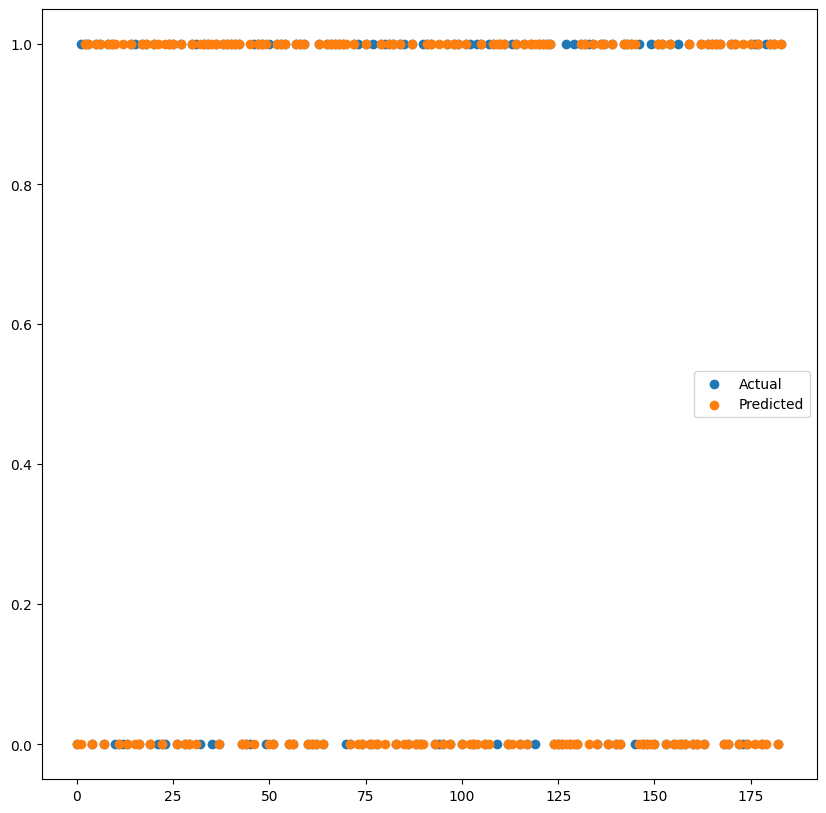

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.show()